# Exercise 8.2 - Time Series Modeling

using the dataset us_retail_sales.csv for this assignment. 
This data gives the total monthly retail sales in the US from January 1992 until June 2021. With this dataset, complete the following steps:

1. Plot the data with proper labeling and make some observations on the graph.
2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.
3. Use the training set to build a predictive model for the monthly retail sales.
4. Use the model to predict the monthly retail sales on the last year of data.
5. Report the RMSE of the model predictions on the test set.


In [1]:
## import the required packages

import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from datetime import datetime

In [2]:
## import the retail sales data into dataframe

sales_df = pd.read_csv('us_retail_sales.csv')
sales_df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


### Understanding the data 

In [3]:
sales_df.shape

(30, 13)

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    30 non-null     int64  
 1   JAN     30 non-null     int64  
 2   FEB     30 non-null     int64  
 3   MAR     30 non-null     int64  
 4   APR     30 non-null     int64  
 5   MAY     30 non-null     int64  
 6   JUN     30 non-null     int64  
 7   JUL     29 non-null     float64
 8   AUG     29 non-null     float64
 9   SEP     29 non-null     float64
 10  OCT     29 non-null     float64
 11  NOV     29 non-null     float64
 12  DEC     29 non-null     float64
dtypes: float64(6), int64(7)
memory usage: 3.2 KB


### Creating a one dimensional data set of the sales data set with Year being the ID, Month being the variable and the sales being the value


In [5]:
sales_data = pd.melt(sales_df, id_vars=["YEAR"], var_name="Month", value_name="Sales")
sales_data

,YEAR,Month,Sales
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0
...,...,...,...
355,2017,DEC,433282.0
356,2018,DEC,434803.0
357,2019,DEC,458055.0
358,2020,DEC,484782.0


Replacing the month names with numbers

In [6]:
sales_data["Month"].replace({'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8,
                'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}, inplace=True)
sales_data

,YEAR,Month,Sales
0,1992,1,146925.0
1,1993,1,157555.0
2,1994,1,167518.0
3,1995,1,182413.0
4,1996,1,189135.0
...,...,...,...
355,2017,12,433282.0
356,2018,12,434803.0
357,2019,12,458055.0
358,2020,12,484782.0


#### creating a new field Date based on the Year and Month fields and assigning the first day of that month.

In [7]:

sales_data['DATE'] = pd.to_datetime(sales_data[['YEAR', 'Month']].assign(DAY=1))
sales_data

,YEAR,Month,Sales,DATE
0,1992,1,146925.0,1992-01-01
1,1993,1,157555.0,1993-01-01
2,1994,1,167518.0,1994-01-01
3,1995,1,182413.0,1995-01-01
4,1996,1,189135.0,1996-01-01
...,...,...,...,...
355,2017,12,433282.0,2017-12-01
356,2018,12,434803.0,2018-12-01
357,2019,12,458055.0,2019-12-01
358,2020,12,484782.0,2020-12-01


#### Sorting the dataset on date and resetting the index values

In [8]:
sales_data = sales_data.sort_values(by=['DATE'])
sales_data

,YEAR,Month,Sales,DATE
0,1992,1,146925.0,1992-01-01
30,1992,2,147223.0,1992-02-01
60,1992,3,146805.0,1992-03-01
90,1992,4,148032.0,1992-04-01
120,1992,5,149010.0,1992-05-01
...,...,...,...,...
239,2021,8,NaN,2021-08-01
269,2021,9,NaN,2021-09-01
299,2021,10,NaN,2021-10-01
329,2021,11,NaN,2021-11-01


In [9]:
sales_data = sales_data.reset_index(drop=True)
sales_data

,YEAR,Month,Sales,DATE
0,1992,1,146925.0,1992-01-01
1,1992,2,147223.0,1992-02-01
2,1992,3,146805.0,1992-03-01
3,1992,4,148032.0,1992-04-01
4,1992,5,149010.0,1992-05-01
...,...,...,...,...
355,2021,8,NaN,2021-08-01
356,2021,9,NaN,2021-09-01
357,2021,10,NaN,2021-10-01
358,2021,11,NaN,2021-11-01


Text(0.5, 1.0, 'Sales per Year')

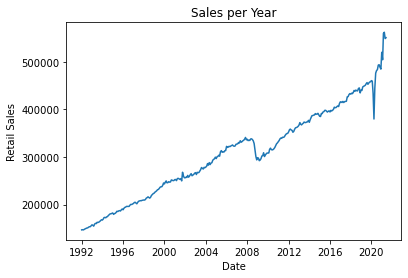

In [10]:
## Plotting the dataset - date vs retail sales

x = sales_data.DATE
y = sales_data.Sales
plt.plot(x, y)
plt.xlabel("Date")
plt.ylabel("Retail Sales")
plt.title("Sales per Year")

We can see there was a slump in the retail sales during the 2008-2009 recession. but it slowly picked up until the 2020 pandemic early that year which again saw a steep fall for a brief period of time.

In [11]:
## Dropping all the nulls in the dataset 

sales_data.dropna(inplace=True)
sales_data

,YEAR,Month,Sales,DATE
0,1992,1,146925.0,1992-01-01
1,1992,2,147223.0,1992-02-01
2,1992,3,146805.0,1992-03-01
3,1992,4,148032.0,1992-04-01
4,1992,5,149010.0,1992-05-01
...,...,...,...,...
349,2021,2,504458.0,2021-02-01
350,2021,3,559871.0,2021-03-01
351,2021,4,562269.0,2021-04-01
352,2021,5,548987.0,2021-05-01


In [12]:
## adding a new feature OrdDate which is the integer conversion of the date value for the purpose of modeling

sales_data['OrdDate'] = pd.to_datetime(sales_data['DATE'])
sales_data['OrdDate'] = sales_data['OrdDate'].map(datetime.toordinal)

### Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

Sales is the target value to be predicted. 

In [13]:
## splitting data into train and test sets

train_df = sales_data[sales_data['DATE'] < '2020-07-01']
test_df = sales_data[sales_data['DATE'] >= '2020-07-01']

In [14]:
X_train = train_df[['OrdDate']]
y_train = train_df[["Sales"]]
X_test = test_df[['OrdDate']]
y_test = test_df[["Sales"]]

In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 342 to 353
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   OrdDate  12 non-null     int64
dtypes: int64(1)
memory usage: 192.0 bytes


### Use the training set to build a predictive model for the monthly retail sales.

#### Building a prediction model using Linear Regression model

In [16]:
## Linear regression modeling
# Create a model
model = LinearRegression()

# Fit the model to the training set
model.fit(X_train, y_train)

LinearRegression()

In [17]:
## predicting the sales values on the test set

test_predictions = model.predict((X_test))
test_predictions

array([[449450.188174  ],
       [450339.37662852],
       [451228.56508304],
       [452089.07003903],
       [452978.25849355],
       [453838.76344953],
       [454727.95190405],
       [455617.14035857],
       [456420.2783175 ],
       [457309.46677202],
       [458169.971728  ],
       [459059.16018252]])

In [18]:
y_test = y_test.reset_index(drop=True)
y_test

,Sales
0,481627.0
1,483716.0
2,493327.0
3,493991.0
4,488652.0
5,484782.0
6,520162.0
7,504458.0
8,559871.0
9,562269.0


In [19]:
## converting the prediction result array to dataframe

pred_test = pd.DataFrame(test_predictions, columns=['pred_sales'])
pred_test

,pred_sales
0,449450.188174
1,450339.376629
2,451228.565083
3,452089.070039
4,452978.258494
5,453838.763450
6,454727.951904
7,455617.140359
8,456420.278317
9,457309.466772


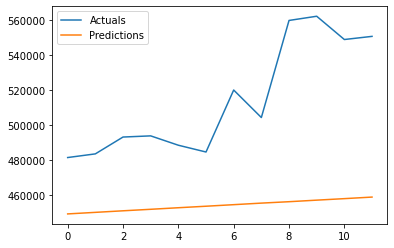

In [20]:
## plotting the actuals and predicted values.

plt.plot(y_test, label = 'Actuals')
plt.plot(test_predictions, label = 'Predictions')
plt.legend()

In [21]:
print('Test RMSE:', metrics.mean_squared_error(y_test, test_predictions, squared=False))

Test RMSE: 66429.10224838056


From the Actuals and Predictions plot and RMSE score, we can see the predicted values are way off the actuals. This could be because the actuals had a spike during the mid of 2020, during the pandemic. 